# Spaceship titanic

# 1. Import Libraries/ Data Loading 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

sns.set(rc={'figure.figsize':(6, 4)})
sns.set_style('whitegrid')
sns.color_palette("flare")
sns.set_palette(sns.color_palette("flare"))

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
sub1 = test_data['PassengerId']

# 2. EDA (Exploratory Data Analysis) and Data Preprocessing


The goal of EDA is to understand the main characteristics of the data and identify any patterns, outliers, or other features of the data that are important to know before building a model or making predictions.

### Observations in Train Data
It's a first step in EDA. It is useful for understanding the main characteristics of the data and identifying any patterns, outliers, or other features of the data.

- There are total of 14 columns and 8693 rows in train data.
- Train data contains 119378 observation with 2324 missing values.
- All 12 feature columns have missing values in them with CryoSleep having highest missing values (217) 
- Transported is the target variable which is only available in the train dataset.

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print(f'Shape of train data: {train_data.shape}')

Shape of train data: (8693, 14)


In [5]:
print(f'Number of rows in train data: {train_data.shape[0]}')
print(f'Number of columns in train data: {train_data.shape[1]}')
print(f'Number of values in train data: {train_data.count().sum()}')
print(f'Number missing values in train data: {sum(train_data.isna().sum())}')

Number of rows in train data: 8693
Number of columns in train data: 14
Number of values in train data: 119378
Number missing values in train data: 2324


In [6]:
print(train_data.isna().sum().sort_values(ascending = False))

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


The basic statistics for each variables which contain information on count, mean, standard deviation, minimum, 1st quartile, median, 3rd quartile and maximum.

In [7]:
# Descriptive Statistics
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The pandas-profiling library allows you to generate a profile report that allows you to obtain the types of all the columns and to access statistical details at the quantile level, descriptions, histograms, and the most frequent and exterm values.

In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(train_data)

### Observations in Test Data
- There are total of 13 columns and 4277 rows in test data.
- Test data contains 54484 observation with 1117 missing values.
- All 12 feature columns have missing values in them with FoodCourt having highest missing values (106)

In [8]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
print(f'Shape of test data: {test_data.shape}')

Shape of test data: (4277, 13)


In [10]:
print(f'Number of rows in test data: {test_data.shape[0]}')
print(f'Number of columns in test data: {test_data.shape[1]}')
print(f'Number of values in train data: {test_data.count().sum()}')
print(f'Number of rows with missing values  in test data: {sum(test_data.isna().sum())}')

Number of rows in test data: 4277
Number of columns in test data: 13
Number of values in train data: 54484
Number of rows with missing values  in test data: 1117


In [11]:
print((test_data.isna().sum().sort_values(ascending = False)))

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


In [12]:
# statistics of test data 
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


### Visualization of data

<AxesSubplot: xlabel='Transported', ylabel='count'>

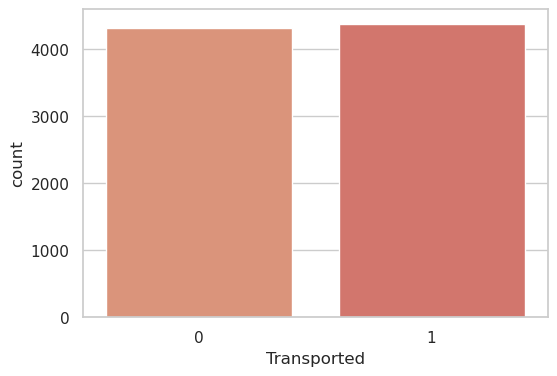

In [13]:
enc =LabelEncoder()
train_data['Transported'] = enc.fit_transform(train_data['Transported'])
sns.countplot(data=train_data,x=train_data.Transported)

<AxesSubplot: xlabel='Destination', ylabel='count'>

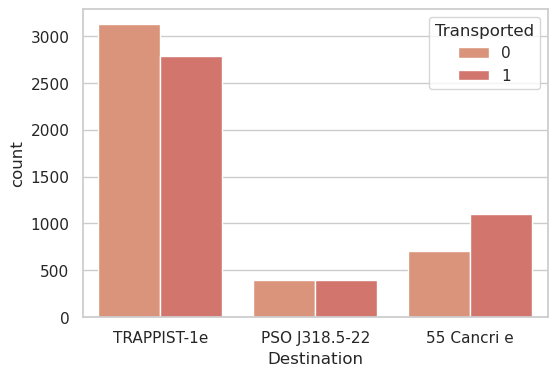

In [14]:
sns.countplot(data=train_data, x='Destination', hue='Transported')

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

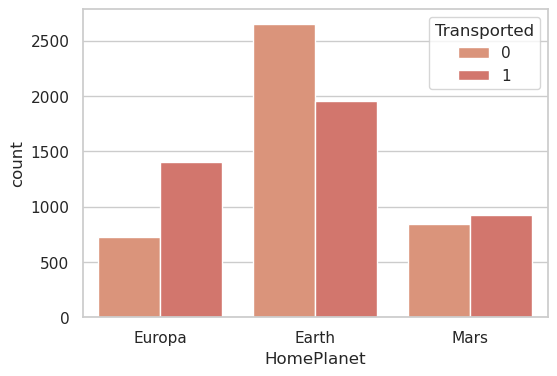

In [15]:
sns.countplot(data=train_data, x='HomePlanet', hue='Transported')

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

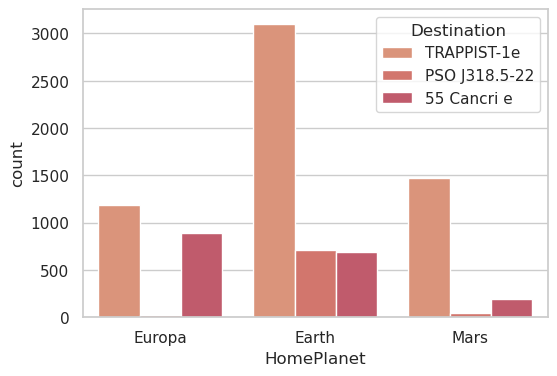

In [16]:
sns.countplot(data=train_data, x='HomePlanet', hue='Destination')

### Visualization of missing data

Text(0.5, 1.0, 'Train set')

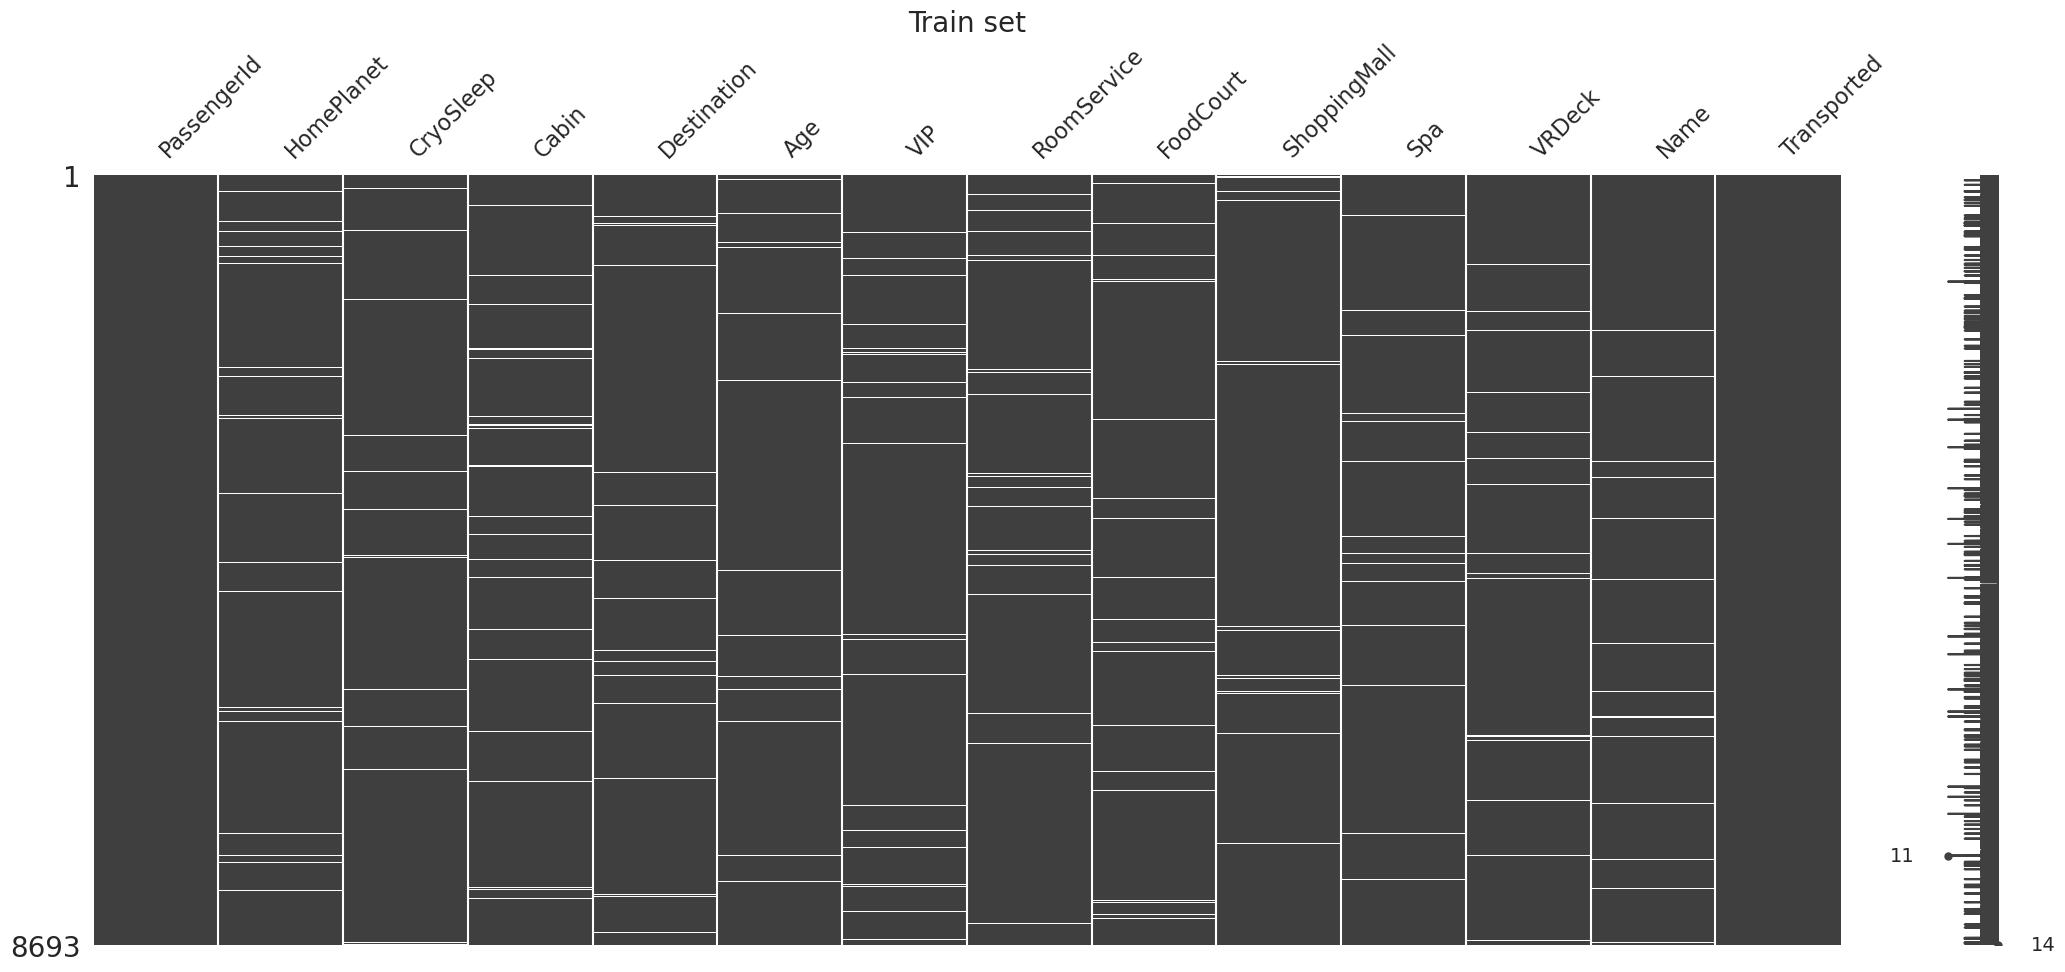

In [17]:
# Using Missingno to Diagnose Data Sparsity

msno.matrix(train_data).set_title("Train set",fontsize=20)

Text(0.5, 1.0, 'Test set')

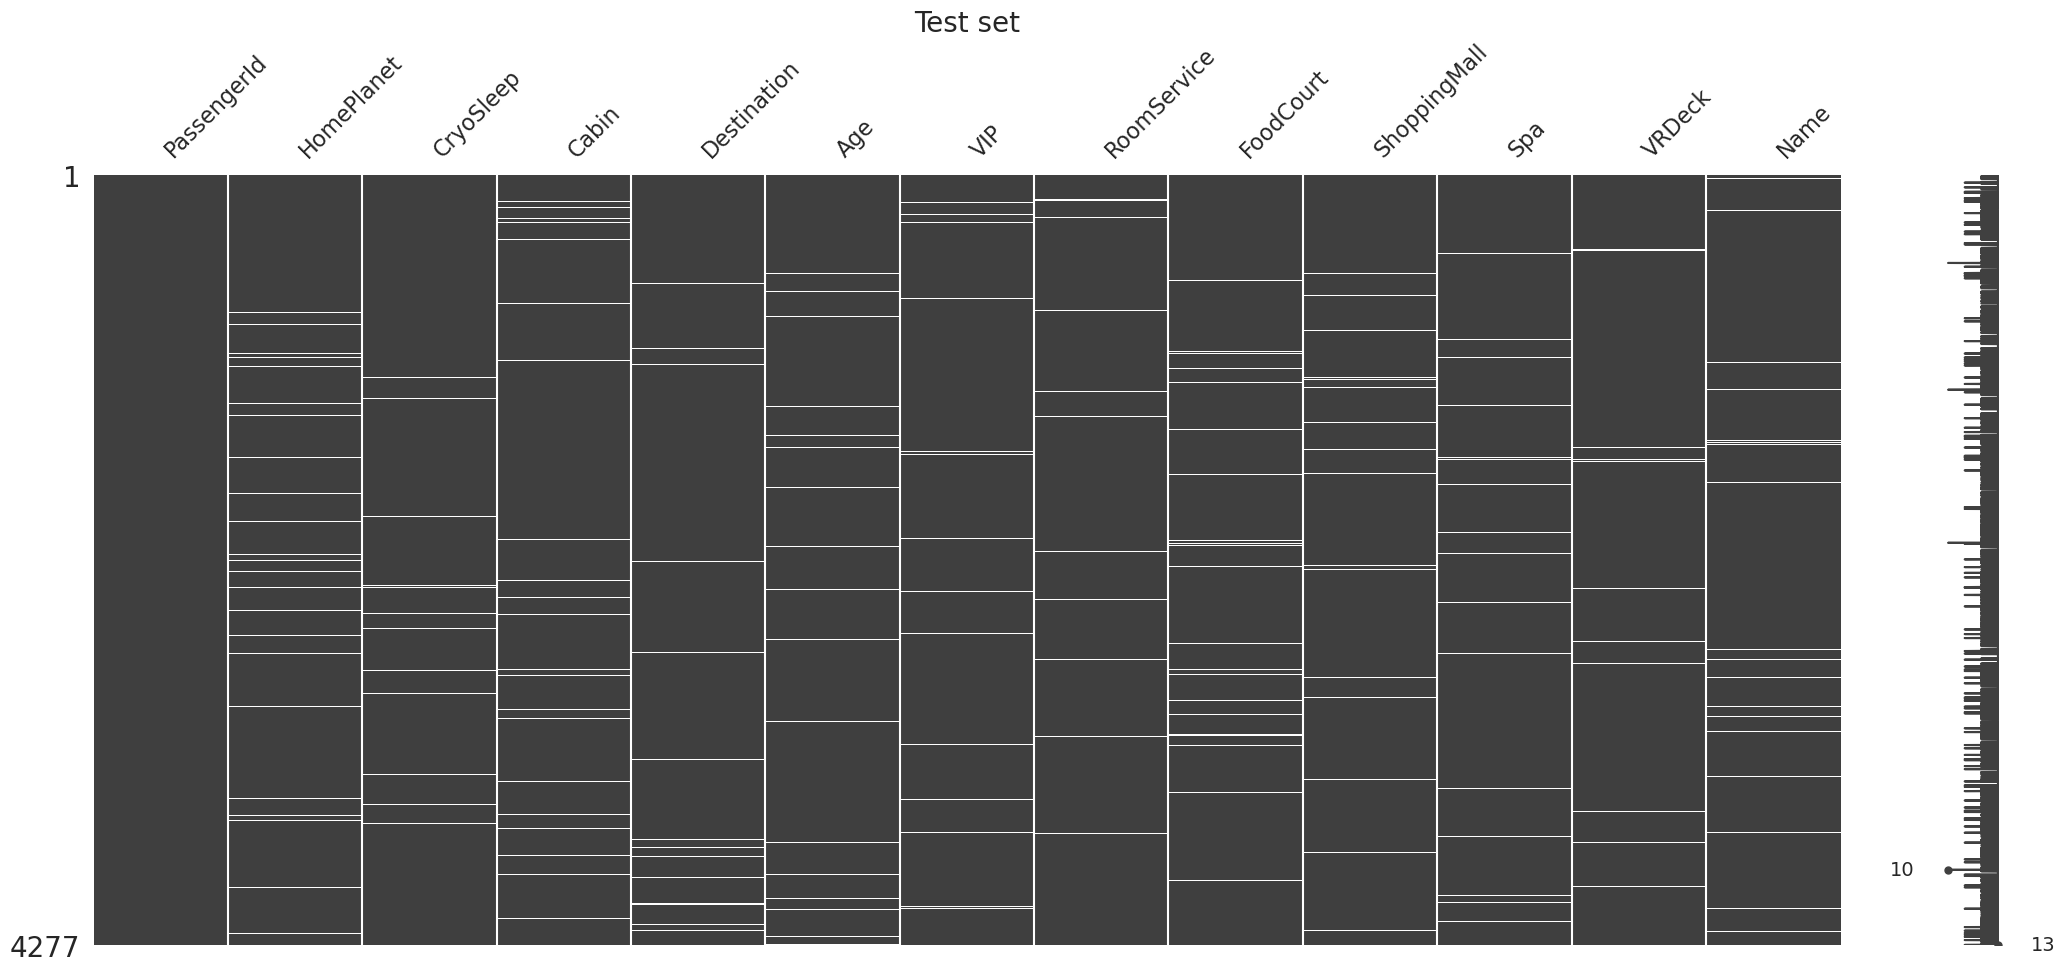

In [18]:
msno.matrix(test_data).set_title("Test set",fontsize=20)

### Correlation matrix

Darker colors indicate a stronger positive correlation, while lighter colors indicate a weaker positive correlation or a negative correlation.

/tmp/ipykernel_12879/2640889923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


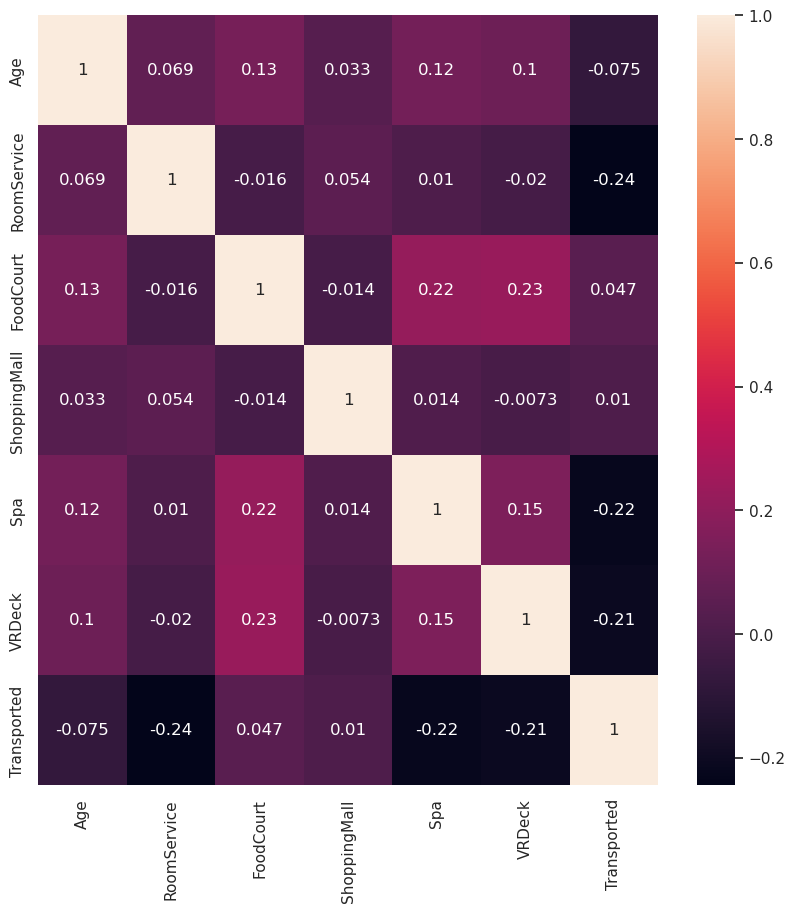

In [19]:
corr = train_data.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

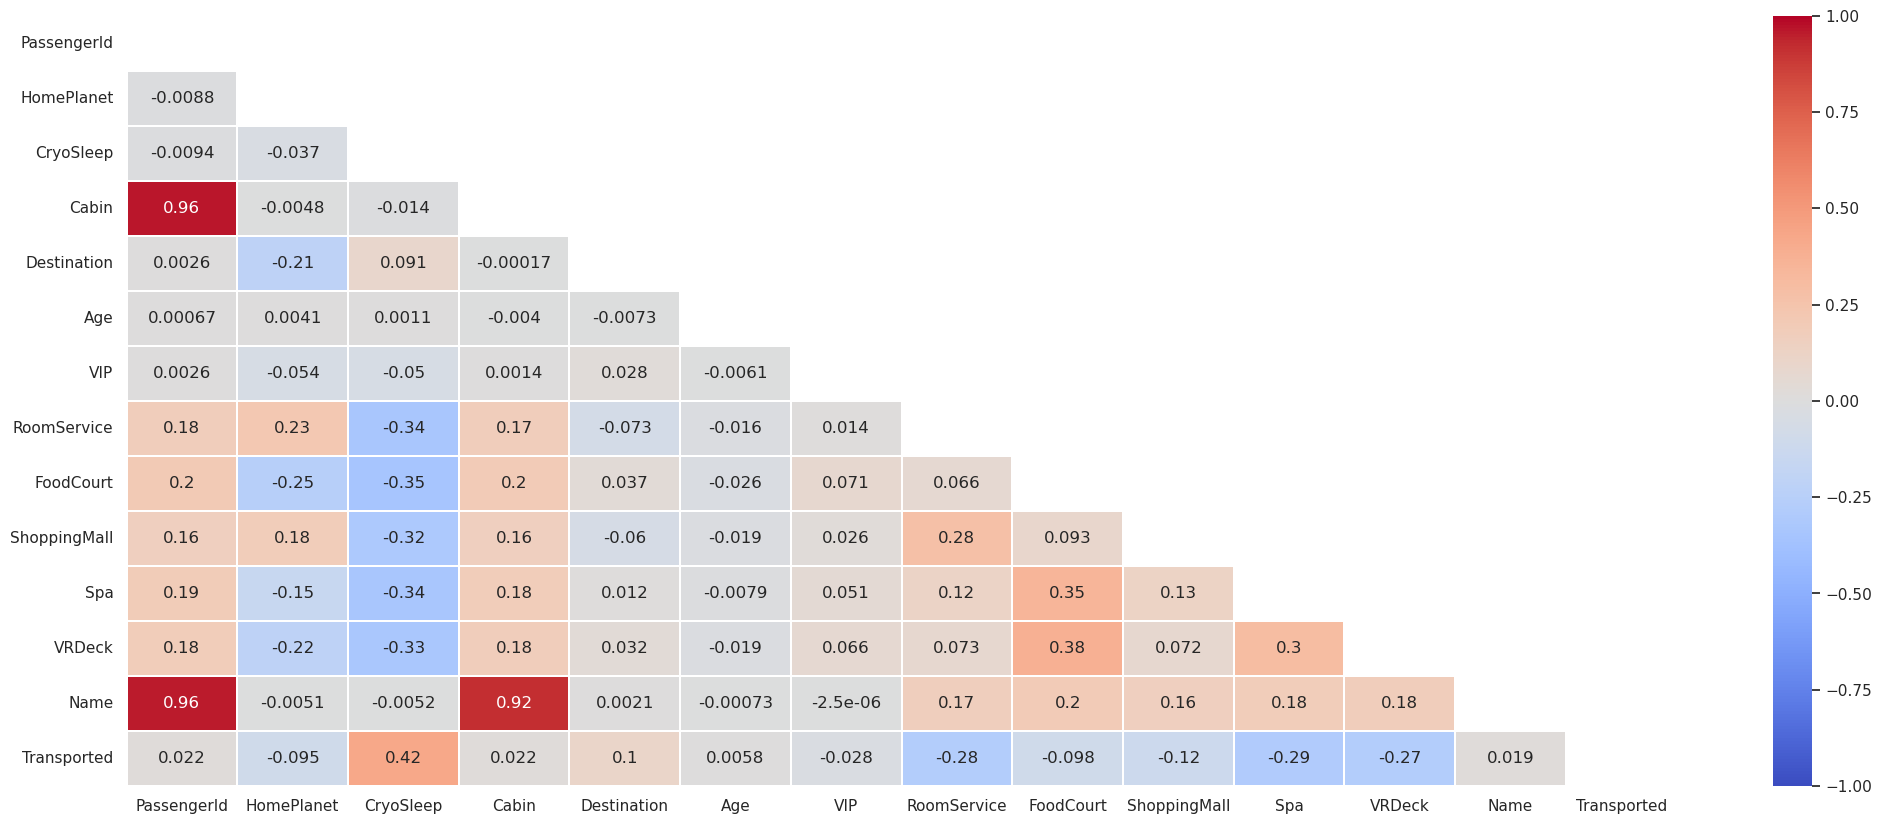

In [20]:
plt.figure(5, figsize=(25, 10))
corr = train_data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# 3. Feature Engineering
Feature engineering is the process of using domain knowledge to extract features from raw data that can be used to train machine learning models. It involves transforming raw data into a format that can be easily understood by the model, such as converting text to numerical values. The goal of feature engineering is to create a set of features that are most informative and relevant for the task at hand, which can improve the performance of the model.


In [21]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [22]:
train_data['Transported'].replace(False, 0, inplace=True)
train_data['Transported'].replace(True, 1, inplace=True)

In [23]:
train_data[['deck','num', 'side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['deck','num', 'side']] = test_data['Cabin'].str.split('/', expand=True)

train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)


train_data.drop('num', axis=1, inplace=True)
test_data.drop('num', axis=1, inplace=True)

In [24]:
col_to_sum = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_data['total_spent'] = train_data[col_to_sum].sum(axis=1)
test_data['total_spent'] = test_data[col_to_sum].sum(axis=1)

<AxesSubplot: >

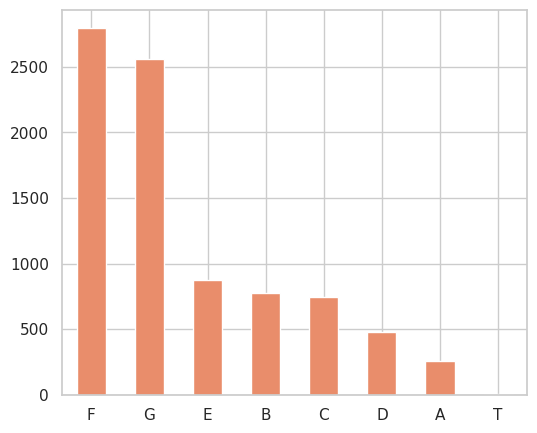

In [25]:
plt.figure(figsize=(6,5 ))
train_data['deck'].value_counts().plot.bar(rot=0)

<AxesSubplot: >

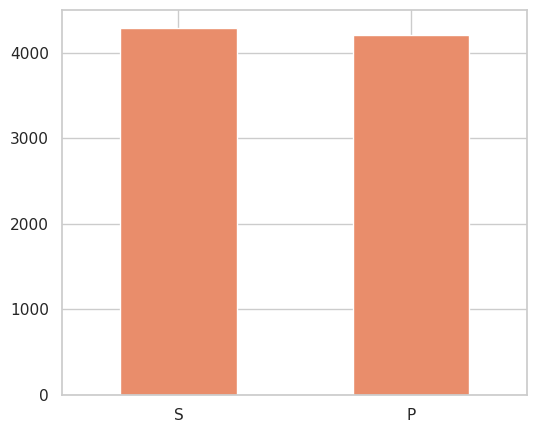

In [26]:
plt.figure(figsize=(6,5 ))
train_data['side'].value_counts().plot.bar(rot=0)

array([[<AxesSubplot: title={'center': 'Age'}>]], dtype=object)

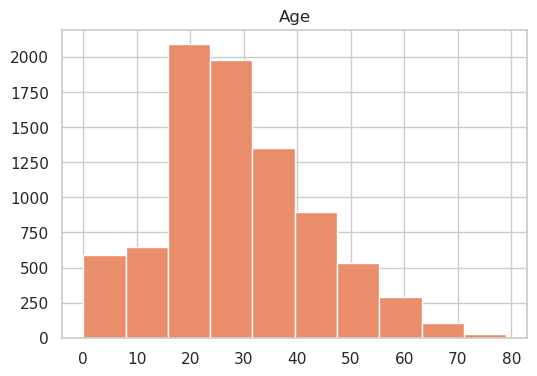

In [27]:
train_data.hist("Age")

In [28]:
train_data.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [29]:
# child : 0, teenager : 1, adult : 2, older : 3
labels=['child', 'teenager', 'adult', 'older']
bins = [0, 12, 21, 45, 80]
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=bins, labels=labels)
test_data['Age_Group'] = pd.cut(test_data['Age'], bins=bins, labels=labels)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,total_spent,Age_Group
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,P,0.0,adult
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,S,736.0,adult
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,S,10383.0,older
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,S,5176.0,adult
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,S,1091.0,teenager


<AxesSubplot: >

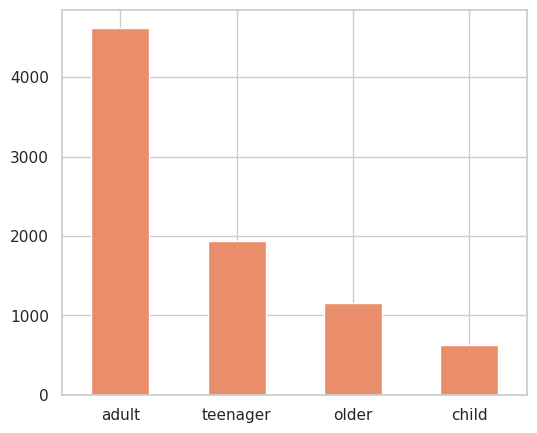

In [30]:
plt.figure(figsize=(6,5 ))
train_data['Age_Group'].value_counts().plot.bar(rot=0)

In [31]:
train_data = train_data.drop("Age", axis=1)
test_data = test_data.drop("Age", axis=1)

train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,total_spent,Age_Group
0,0001_01,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,0,B,P,0.0,adult
1,0002_01,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,1,F,S,736.0,adult
2,0003_01,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,0,A,S,10383.0,older
3,0003_02,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,0,A,S,5176.0,adult
4,0004_01,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,1,F,S,1091.0,teenager


In [32]:
train_data['Passenger_Group'] = train_data['PassengerId'].str.split('_', 1, expand=True)[1].astype(int)
test_data['Passenger_Group'] = test_data['PassengerId'].str.split('_', 1, expand=True)[1].astype(int)

train_data.set_index('PassengerId',inplace=True)
test_data.set_index('PassengerId',inplace=True)

# train_data = train_data.drop("PassengerId", axis = 1)
# test_data = test_data.drop("PassengerId", axis = 1)

/tmp/ipykernel_12879/414063447.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train_data['Passenger_Group'] = train_data['PassengerId'].str.split('_', 1, expand=True)[1].astype(int)
/tmp/ipykernel_12879/414063447.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  test_data['Passenger_Group'] = test_data['PassengerId'].str.split('_', 1, expand=True)[1].astype(int)


In [33]:
train_data.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,total_spent,Age_Group,Passenger_Group
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,0,B,P,0.0,adult,1
0002_01,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,1,F,S,736.0,adult,1
0003_01,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,0,A,S,10383.0,older,1
0003_02,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,0,A,S,5176.0,adult,2
0004_01,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,1,F,S,1091.0,teenager,1


### Outliers detection

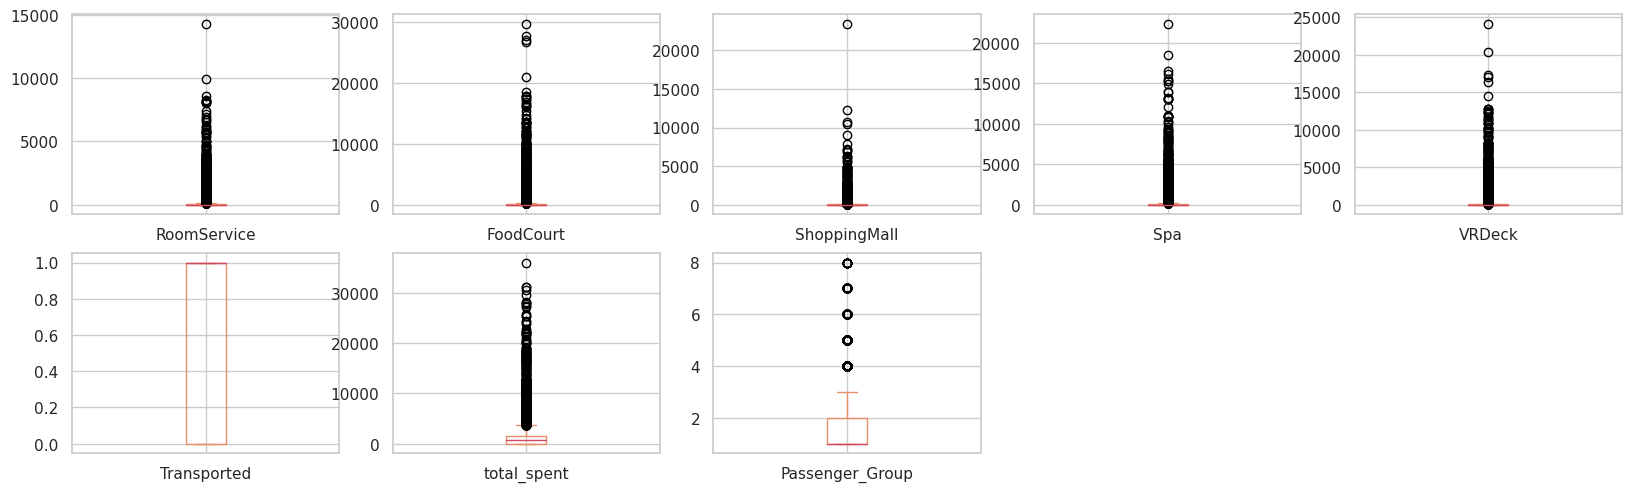

In [34]:
train_data.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,15) )
plt.show()

<AxesSubplot: >

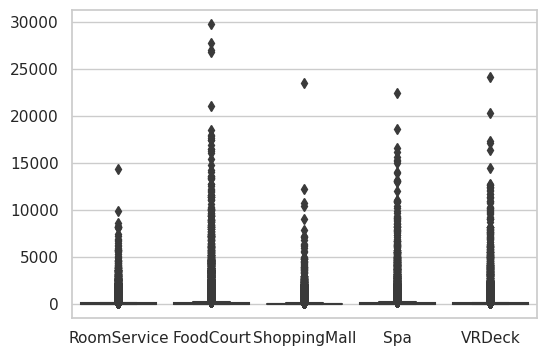

In [35]:
sns.boxplot(data=train_data[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]])

###  Imputing Missing Values


We are using Simple Imputer to fill the na values with the specified strategy.

For ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'side', 'Age_Group'] we use the strategy most_frequent as it is categorical data.

For ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spent'] we use the strategy median as it is numeric data.


In [36]:
categorical_cols = [col for col in train_data.columns if train_data[col].dtype == 'object' or train_data[col].dtype == 'category']
numeric_cols = [col for col in train_data.columns if train_data[col].dtype == 'float64']

print(f'Categorical cols -- {categorical_cols}')
print(f'Numeric cols -- {numeric_cols}')

Categorical cols -- ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'side', 'Age_Group']
Numeric cols -- ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spent']


In [37]:
train_data[categorical_cols] = train_data[categorical_cols].astype('category')
test_data[categorical_cols] = test_data[categorical_cols].astype('category')

In [38]:
from sklearn.preprocessing import OrdinalEncoder

oc = OrdinalEncoder()
data_for_encode = pd.concat([train_data, test_data])
data_for_encode[categorical_cols] = data_for_encode[categorical_cols].astype('category')
data_for_encode[categorical_cols] = oc.fit_transform(data_for_encode[categorical_cols])

del train_data, test_data

train_data = data_for_encode.iloc[:8693, :]
test_data = data_for_encode.iloc[8693: , :]

del data_for_encode

test_data.drop('Transported', inplace=True, axis=1)

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

ctc = ColumnTransformer([("imp", SimpleImputer(strategy='most_frequent'), categorical_cols)])
    
train_data[categorical_cols] = ctc.fit_transform(train_data[categorical_cols])
test_data[categorical_cols] = ctc.fit_transform(test_data[categorical_cols])

ctn = ColumnTransformer([("imp", SimpleImputer(strategy='median'), numeric_cols)])

train_data[numeric_cols] = ctn.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = ctn.fit_transform(test_data[numeric_cols])

train_data["Transported"].fillna(method='ffill', inplace = True)

In [40]:
train_data.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,total_spent,Age_Group,Passenger_Group
PassengerId,,,,,,,,,,,,,,,
0001_01,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
0002_01,0.0,0.0,2.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,5.0,1.0,736.0,0.0,1
0003_01,1.0,0.0,2.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,1.0,10383.0,2.0,1
0003_02,1.0,0.0,2.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,1.0,5176.0,0.0,2
0004_01,0.0,0.0,2.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,5.0,1.0,1091.0,3.0,1


# Modeling

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score


In [42]:
X = train_data.drop('Transported',axis=1)
y = train_data['Transported']

X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'deck', 'side',
       'total_spent', 'Age_Group', 'Passenger_Group'],
      dtype='object')

In [43]:
X_test_data = test_data

### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_data_scaled = scaler.fit_transform(X_test_data)

### Splitting Data For Model Which Don't Need Scaled Data.

In [45]:
X_train , X_test , y_train , y_test = train_test_split(X, 
                                                       y, 
                                                       random_state = 0,
                                                       test_size =0.20)

In [46]:
print(X_train.shape, y_train.shape)

(6954, 14) (6954,)


### Splitting Data For Model Which Need Scaled Data.

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [48]:
print(X_test1.shape, y_test1.shape)

(1739, 14) (1739,)


### Model Building For Scaled Data 

### LogisticRegression

In [49]:
model_Log = LogisticRegression(max_iter=10000)
model_Log.fit(X_train1,y_train1)
model_Log.score(X_train1,y_train1)

0.7861662352602818

In [50]:
y_pred_log= model_Log.predict(X_test1)

In [51]:
model_Log.score(X_test1, y_test1)

0.7791834387579069

In [52]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy_log=accuracy_score(y_pred_log, y_test1)
print('Logistic regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test1, y_pred_log)))

Logistic regression Model accuracy score: 0.7792


In [53]:
model_Log.coef_

array([[ 0.19902899,  0.71553953, -0.19209709, -0.0726186 , -0.87305497,
         1.36253917,  0.47007151, -1.76372805, -1.62858714, -0.53539642,
         0.26459526, -0.69690125,  0.0188659 ,  0.07641501]])

### SVM

In [54]:
model_svc = SVC(random_state = 42)
model_svc.fit(X_train1,y_train1)
model_svc.score(X_train1,y_train1)

0.8037100949094047

In [55]:
y_pred_svc = model_svc.predict(X_test1)

In [56]:
model_svc.score(X_test1, y_test1)

0.7878090856814262

In [57]:
model_svc.support_vectors_

array([[ 0.44038529, -0.73277002, -1.83368499, ...,  6.12052829,
         0.78606905, -0.49116146],
       [-0.81725903,  1.36468464, -0.60657001, ..., -0.51406554,
         0.78606905, -0.49116146],
       [-0.81725903, -0.73277002, -1.83368499, ..., -0.20795232,
        -0.7964456 , -0.49116146],
       ...,
       [ 1.6980296 ,  1.36468464,  0.62054498, ..., -0.51406554,
        -0.7964456 , -0.49116146],
       [-0.81725903, -0.73277002,  0.62054498, ..., -0.14837084,
        -0.7964456 , -0.49116146],
       [-0.81725903, -0.73277002, -0.60657001, ..., -0.26824735,
         0.78606905, -0.49116146]])

In [58]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy_svm=accuracy_score(y_pred_svc, y_test1)
print('SVM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test1, y_pred_svc)))

SVM Model accuracy score: 0.7878


### K-Neighbors Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(2,15)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train1,y_train1)
knn_gscv.best_params_

{'n_neighbors': 12}

In [61]:
model_knn = KNeighborsClassifier(n_neighbors=12)
model_knn.fit(X_train1,y_train1)
model_knn.score(X_train1,y_train1)

0.7978142076502732

In [62]:
y_pred_knn = model_knn.predict(X_test1)

In [63]:
model_knn.score(X_test1, y_test1)

0.7659574468085106

In [64]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy_knn=accuracy_score(y_pred_knn, y_test1)
print('K-Neighbors Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test1, y_pred_knn)))

K-Neighbors Model accuracy score: 0.7660


### Model Building For Un-Scaled Data


### Random Forest

In [65]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)
model_forest.score(X_train,y_train)

0.9315501869427667

In [66]:
y_pred_forest = model_forest.predict(X_test)

In [67]:
model_forest.score(X_test, y_test)

0.7906843013225991

In [68]:
# fine tunnig random forest 
model_forest = RandomForestClassifier()

forest_params = [{'n_estimators':[500],
                'min_samples_leaf':[4]}]

forest_grid = GridSearchCV(estimator=model_forest, param_grid=forest_params, cv=5)
forest_grid.fit(X_train, y_train)
forest_grid.best_estimator_

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [69]:
model_forest_final = forest_grid.best_estimator_
y_pred_forest2 = model_forest_final.predict(X_test)

In [70]:
model_forest_final.score(X_test, y_test)

0.7947096032202415

In [71]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy_rfc=accuracy_score(y_pred_forest2, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_forest2)))

Random Forest Model accuracy score: 0.7947


In [72]:
model_forest_final.feature_importances_

array([0.04455427, 0.10674267, 0.01814332, 0.00087563, 0.10162797,
       0.09946182, 0.083639  , 0.11392851, 0.09833255, 0.06223985,
       0.01908197, 0.21064731, 0.02174108, 0.01898405])

### Gradient Boosting Classifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
model_gbr = GradientBoostingClassifier(random_state = 1)
  
# Fit to training set
model_gbr.fit(X_train, y_train)
model_gbr.score(X_train,y_train)

0.8155018694276676

In [74]:
y_pred_gbr = model_gbr.predict(X_test)

In [75]:
model_gbr.score(X_test, y_test)

0.7929844738355377

In [76]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy_gbr=accuracy_score(y_pred_gbr, y_test)
print('Gradint Boost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gbr)))

Gradint Boost Model accuracy score: 0.7930


### Tuning the Gradient Boosting classifier

In [77]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,100],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1,1]
}
cv = RandomizedSearchCV(gbc, parameters, n_iter=27, scoring='accuracy', n_jobs=-1, cv=5, random_state=1)
cv.fit(X_train,y_train)
cv.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [78]:
model2_gbc = GradientBoostingClassifier(n_estimators=50,max_depth=5,learning_rate=0.1) #best params from gscv

model2_gbc.fit(X_train,y_train)
model2_gbc.score(X_train,y_train)

0.8285878631003739

In [79]:
y_pred_gbc = model2_gbc.predict(X_test)

In [80]:
model2_gbc.score(X_test, y_test)

0.7947096032202415

In [81]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy_gbc=accuracy_score(y_pred_gbc, y_test)
print('Gradient Boost Model Tuned accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gbc)))

Gradient Boost Model Tuned accuracy score: 0.7947


### Extreme Gradient Boosting

In [82]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
model_xgb.score(X_train,y_train)

0.8986194995685937

In [83]:
y_pred_xgb = model_xgb.predict(X_test)

In [84]:
model_xgb.score(X_test, y_test)

0.7964347326049454

In [85]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy_xgb=accuracy_score(y_pred_xgb, y_test)
print('Exterme Gradient Boost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_xgb)))

Exterme Gradient Boost Model accuracy score: 0.7964


### CatBoost

In [86]:
from catboost import CatBoostClassifier

model_cat=CatBoostClassifier(iterations=3000,
                         eval_metric='Accuracy',
                        verbose=0)


In [87]:
model_cat.fit(X_train,y_train)

In [88]:
from sklearn.metrics import accuracy_score
pred = model_cat.predict(X_train)
print(accuracy_score(y_train.values,pred))

0.8554788610871441


In [89]:
y_pred_cat = model_cat.predict(X_test)

In [90]:
model_cat.score(X_test, y_test)

0.8067855089131685

In [91]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy_cat=accuracy_score(y_pred_cat, y_test)
print('CatBoost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_cat)))

CatBoost Model accuracy score: 0.8068


### AdaBoost

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
ada_boost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [94]:
ada_boost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [95]:
ada_boost_model.score(X_train,y_train)

0.7949381650848433

In [96]:
y_pred_adaboost = ada_boost_model.predict(X_test)

In [97]:
ada_boost_model.score(X_test, y_test)

0.7843588269120184

### Fine tune AdaBoost Classifier

In [98]:
abc = AdaBoostClassifier()

param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 1],
              'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                 DecisionTreeClassifier(max_depth=2)]}

grid_search = GridSearchCV(abc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 0.1,
 'n_estimators': 200}

In [99]:
model2_abc = AdaBoostClassifier(n_estimators=200,learning_rate=0.1, base_estimator=DecisionTreeClassifier(max_depth=2)) #best params from abc

model2_abc.fit(X_train,y_train)
model2_abc.score(X_train,y_train)

0.8133448375035951

In [100]:
y_pred_abc = model2_abc.predict(X_test)

In [101]:
model2_abc.score(X_test, y_test)

0.7849338700402531

In [102]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy_ada=accuracy_score(y_pred_abc, y_test)
print('AdaBoost Classifier accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_abc)))

AdaBoost Classifier accuracy score: 0.7849


### Lazy Classifier

In [103]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from IPython.display import clear_output

In [104]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()

In [105]:
models[:15]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.80,0.80,0.80,0.80,0.11
XGBClassifier,0.80,0.80,0.80,0.80,0.21
SVC,0.79,0.79,0.79,0.79,1.53
AdaBoostClassifier,0.78,0.78,0.78,0.78,0.22
ExtraTreesClassifier,0.78,0.78,0.78,0.78,0.42
SGDClassifier,0.78,0.78,0.78,0.78,0.12
BaggingClassifier,0.78,0.78,0.78,0.78,0.15
LinearSVC,0.78,0.78,0.78,0.78,0.45
CalibratedClassifierCV,0.78,0.78,0.78,0.78,1.59


###  LightGBM model

In [106]:
# build the lightgbm model
import lightgbm as lgb

model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train, y_train)

LGBMClassifier()

In [107]:
# predict the results
y_pred_lgbm =model_lgbm.predict(X_test)

In [108]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy_lgbm=accuracy_score(y_pred_lgbm, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_lgbm)))

LightGBM Model accuracy score: 0.7993


In [109]:
import pandas as pd

model_results = [('Logistic Regression', accuracy_log),
                 ('Random Forest Classifier', accuracy_rfc),
                 ('K-Neighbors', accuracy_knn),
                 ('LightGBM Classifier', accuracy_lgbm),
                 ('AdaBoost Classifier', accuracy_ada),
                 ('CatBoost Classifier', accuracy_cat),
                 ('SVM Classifier', accuracy_svm),
                 ('Exterme Gradient Boost Classifier', accuracy_xgb),
                 ('Gradient Boost Classifier', accuracy_gbc)
                ]

df = pd.DataFrame(model_results, columns=['Model', 'Test Accuracy'])

df = df.sort_values(by='Test Accuracy', ascending=False)

df_results = df.reset_index(drop=True)
print(df_results)

                               Model  Test Accuracy
0                CatBoost Classifier           0.81
1                LightGBM Classifier           0.80
2  Exterme Gradient Boost Classifier           0.80
3           Random Forest Classifier           0.79
4          Gradient Boost Classifier           0.79
5                     SVM Classifier           0.79
6                AdaBoost Classifier           0.78
7                Logistic Regression           0.78
8                        K-Neighbors           0.77


### PREDICTION

In [110]:
pred = model_cat.predict(X_test_data)
sub=pd.DataFrame({'Transported':pred.astype(bool)},index=X_test_data.index)
sub.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False


In [111]:
sub = sub.reset_index()

In [112]:
PID   = pd.DataFrame (sub1,   columns = ['PassengerId'])
Trans = pd.DataFrame (sub,    columns = ['Transported'])

In [113]:
submission = pd.concat([PID, Trans], axis=1)
submission = submission.reset_index()
del submission['index']

submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [114]:
submission.to_csv('submission.csv', index=None)